In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1].values.reshape(-1,1)
y = dataset.iloc[:,-1].values.reshape(-1,1)

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X =  StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
print(X,y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [4]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X,y)

c:\users\marc\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [5]:
y_pred = svr.predict(sc_X.transform([[6.5]]))
sc_y.inverse_transform(y_pred)

array([170370.0204065])

[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


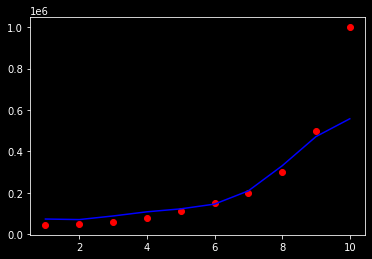

In [6]:
X_inv = sc_X.inverse_transform(X)
y_inv = sc_y.inverse_transform(y)
print(y_inv)
y_pred_inv = sc_y.inverse_transform(svr.predict(X))
plt.scatter(X_inv,y_inv,color='red')
plt.plot(X_inv,y_pred_inv,color='blue')